In [2]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Importação de dados financeiros
import yfinance as yf
import quandl


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-i1xb3ih8 because the default path (/home/mbaltar/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## 2. Criar e organizar um dataframe

### 2.1 Dataframe simples, uma coluna

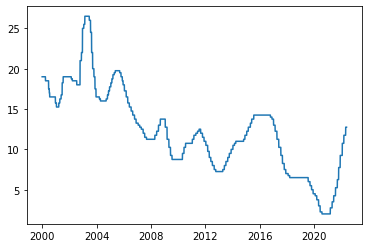

In [3]:
# Inserir a chave de API para Quandl
quandl.ApiConfig.api_key = 'E4NszAgPfgyuJCTJRqrF'

selic = quandl.get('BCB/432', start_date = '2000-01-01', end_date = '2022-12-31')
plt.figure()
plt.plot(selic)
plt.show()

### 2.2 Filtros simples

In [4]:
# Método .loc
selic_filtrada = selic.loc['2021-05-26']
selic_filtrada

Value    3.5
Name: 2021-05-26 00:00:00, dtype: float64

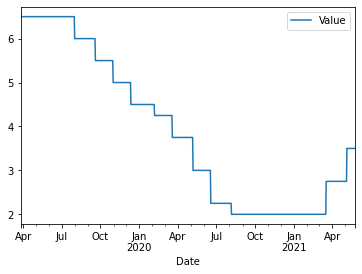

In [5]:
selic_filtrada = selic.loc['2019-03-26':'2021-05-26']
selic_filtrada.plot();

In [6]:
# Método .iloc

# Primeira linha do dataframe
selic_filtrada = selic.iloc[0]
selic_filtrada

Value    19.0
Name: 2000-01-01 00:00:00, dtype: float64

In [7]:
# Última linha do dataframe
selic_filtrada = selic.iloc[-1]
selic_filtrada

Value    12.75
Name: 2022-05-29 00:00:00, dtype: float64

In [8]:
# Range de linhas
selic_filtrada = selic.iloc[20:200]
selic_filtrada

,Value
Date,
2000-01-21,19.0
2000-01-22,19.0
2000-01-23,19.0
2000-01-24,19.0
2000-01-25,19.0
...,...
2000-07-14,17.0
2000-07-15,17.0
2000-07-16,17.0


### 2.4 Manejo de NAs e NaN

In [9]:
cotacoes_IBOV = pd.read_csv('Bovespa.csv')

In [10]:
cotacoes_IBOV.index = cotacoes_IBOV['Date']

In [11]:
cotacoes_IBOV.head()

,Date,ABCB4,BBAS3,BBDC4,BPAN4,BTOW3,CGAS3,CMIG4,CSNA3,CYRE3,...,POMO4,QGEP3,RAPT4,SAPR4,SBSP3,SUZB5,TUPY3,USIM5,VALE5,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
6/5/2012,6/5/2012,5.778904,13.193346,14.825962,NaN,4.67417,21.089613,16.403233,9.799454,13.011072,...,3.559332,7.938090,6.136378,4.945431,19.482090,4.228104,18.623053,7.724799,28.628716,6.314218
6/6/2012,6/6/2012,5.784656,13.474055,15.421063,NaN,4.95184,21.367132,17.082111,9.838496,13.979592,...,3.727821,8.013066,6.316431,4.918369,19.842842,4.291890,18.852964,7.456715,29.472841,6.454251
6/8/2012,6/8/2012,5.836405,13.488092,15.457347,NaN,5.08142,22.088638,17.082111,9.799454,14.025277,...,3.694127,7.825626,6.338035,5.256635,19.926100,4.437686,18.535686,7.635437,29.727674,6.368317
6/11/2012,6/11/2012,5.922663,13.614412,15.628112,NaN,5.09993,22.088638,17.120369,9.705755,13.723758,...,3.753094,7.413257,6.482082,5.195747,20.203676,4.237216,17.629826,7.883664,29.377279,6.368317
6/12/2012,6/12/2012,5.876658,13.614412,15.886813,NaN,5.34984,22.088638,17.689350,9.736986,13.632388,...,3.799433,7.413257,6.482082,5.202512,20.739265,4.146093,17.933311,7.754586,30.038250,6.365140


In [12]:

count_null = cotacoes_IBOV.isna().sum()
count_null.head()

Date       0
ABCB4      2
BBAS3     81
BBDC4      3
BPAN4    628
dtype: int64

In [13]:
acoes = list(cotacoes_IBOV.columns[1:])
acoes = [acao + '.SA' for acao in acoes]
cotacoes_IBOV2 = yf.download(acoes, start='2020-01-01')

[*********************100%***********************]  33 of 33 completed

8 Failed downloads:
- SUZB5.SA: No data found for this date range, symbol may be delisted
- ELPL4.SA: No data found for this date range, symbol may be delisted
- QGEP3.SA: No data found, symbol may be delisted
- HGTX3.SA: No data found, symbol may be delisted
- LAME4.SA: No data found, symbol may be delisted
- VALE5.SA: No data found for this date range, symbol may be delisted
- FIBR3.SA: No data found for this date range, symbol may be delisted
- BTOW3.SA: No data found, symbol may be delisted


In [14]:
cotacoes_IBOV2.head()

Adj Close                                            \
                      ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA BTOW3.SA   
Date                                                                       
2020-01-02 00:00:00  18.165266  46.397064  26.089582  10.222466      NaN   
2020-01-03 00:00:00  18.567944  46.319443  26.102785  10.664061      NaN   
2020-01-06 00:00:00  18.451616  45.707146  25.636536  10.908348      NaN   
2020-01-07 00:00:00  18.218956  45.362179  25.191172  10.898953      NaN   
2020-01-08 00:00:00  18.165266  44.948227  24.801474  10.804996      NaN   

                                                                            \
                       CGAS3.SA  CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA   
Date                                                                         
2020-01-02 00:00:00  125.681709  7.292889  13.735014  26.485884  31.213778   
2020-01-03 00:00:00  125.672905  7.214075  13.632165  27.924683  30.739603   
2020-01-06 00:00:00  123.148361  7.313906  13.295568  27.669273  30.886765   
2020-01-07 00:00:00  145.130356  7.581872  13.295568  27.754408  31.679779   
2020-01-08 00:00:00  146.018768  7.792043  13.276869  26.894535  32.137608   

                     ...      Volume                                  \
                     ...    POMO4.SA QGEP3.SA   RAPT4.SA    SAPR4.SA   
Date                 ...                                               
2020-01-02 00:00:00  ...  12840700.0      NaN  3460300.0   2757300.0   
2020-01-03 00:00:00  ...   9745500.0      NaN  2947800.0  26943900.0   
2020-01-06 00:00:00  ...  13401500.0      NaN  3225600.0  10079100.0   
2020-01-07 00:00:00  ...   8261100.0      NaN  2760800.0   3516600.0   
2020-01-08 00:00:00  ...   8464800.0      NaN  2393000.0   2796600.0   

                                                                         \
                      SBSP3.SA SUZB5.SA   TUPY3.SA    USIM5.SA VALE5.SA   
Date                                                                      
2020-01-02 00:00:00  1885800.0      NaN   787700.0  16086300.0      NaN   
2020-01-03 00:00:00  2573200.0      NaN  1180400.0  11563400.0      NaN   
2020-01-06 00:00:00  2181600.0      NaN  1105500.0  17307100.0      NaN   
2020-01-07 00:00:00  2879500.0      NaN   717900.0   9681400.0      NaN   
2020-01-08 00:00:00  3572000.0      NaN   580800.0  13776000.0      NaN   

                                
                      WEGE3.SA  
Date                            
2020-01-02 00:00:00  5876000.0  
2020-01-03 00:00:00  7345800.0  
2020-01-06 00:00:00  6366600.0  
2020-01-07 00:00:00  6303600.0  
2020-01-08 00:00:00  8153800.0  

[5 rows x 198 columns]

In [15]:
cotacoes_IBOV2.isna().sum()

Adj Close  ABCB4.SA      1
           BBAS3.SA      1
           BBDC4.SA      1
           BPAN4.SA      1
           BTOW3.SA    598
                      ... 
Volume     SUZB5.SA    598
           TUPY3.SA      1
           USIM5.SA      1
           VALE5.SA    598
           WEGE3.SA      1
Length: 198, dtype: int64

In [16]:
count_null_linha = cotacoes_IBOV2.isna().sum(1)

In [17]:
count_null_linha

Date
2020-01-02     48
2020-01-03     48
2020-01-06     48
2020-01-07     48
2020-01-08     48
             ... 
2022-05-25     48
2022-05-26     48
2022-05-27     48
2022-05-30     54
2021-04-02    198
Length: 598, dtype: int64

In [18]:
cotacoes_IBOV2.shape

(598, 198)

In [19]:
len(cotacoes_IBOV2.columns)

198

In [20]:
# Filtro para trazer apenas as linhas que tem pelo menos 1 NA

cotacoes_IBOV2[cotacoes_IBOV2.isna().sum(1) > 0]

Adj Close                                                        \
             ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA BTOW3.SA    CGAS3.SA   
Date                                                                          
2020-01-02  18.165266  46.397064  26.089582  10.222466      NaN  125.681709   
2020-01-03  18.567944  46.319443  26.102785  10.664061      NaN  125.672905   
2020-01-06  18.451616  45.707146  25.636536  10.908348      NaN  123.148361   
2020-01-07  18.218956  45.362179  25.191172  10.898953      NaN  145.130356   
2020-01-08  18.165266  44.948227  24.801474  10.804996      NaN  146.018768   
...               ...        ...        ...        ...      ...         ...   
2022-05-25  16.520000  37.570000  20.180000   7.710000      NaN  124.070000   
2022-05-26  16.660000  37.459999  20.290001   8.210000      NaN  124.070000   
2022-05-27  16.930000  37.049999  20.580000   8.150000      NaN  124.070000   
2022-05-30  16.750000  35.810001  20.410000   8.120000      NaN         NaN   
2021-04-02        NaN        NaN        NaN        NaN      NaN         NaN   

                                                        ...      Volume  \
             CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA  ...    POMO4.SA   
Date                                                    ...               
2020-01-02   7.292889  13.735014  26.485884  31.213778  ...  12840700.0   
2020-01-03   7.214075  13.632165  27.924683  30.739603  ...   9745500.0   
2020-01-06   7.313906  13.295568  27.669273  30.886765  ...  13401500.0   
2020-01-07   7.581872  13.295568  27.754408  31.679779  ...   8261100.0   
2020-01-08   7.792043  13.276869  26.894535  32.137608  ...   8464800.0   
...               ...        ...        ...        ...  ...         ...   
2022-05-25  12.040000  21.000000  14.280000  44.919998  ...   4207900.0   
2022-05-26  11.730000  21.629999  14.630000  44.000000  ...   8172700.0   
2022-05-27  11.540000  22.299999  14.310000  43.459999  ...   2308900.0   
2022-05-30  11.280000  22.100000  13.960000  42.799999  ...    377100.0   
2021-04-02        NaN        NaN        NaN        NaN  ...         NaN   

                                                                           \
           QGEP3.SA   RAPT4.SA    SAPR4.SA   SBSP3.SA SUZB5.SA   TUPY3.SA   
Date                                                                        
2020-01-02      NaN  3460300.0   2757300.0  1885800.0      NaN   787700.0   
2020-01-03      NaN  2947800.0  26943900.0  2573200.0      NaN  1180400.0   
2020-01-06      NaN  3225600.0  10079100.0  2181600.0      NaN  1105500.0   
2020-01-07      NaN  2760800.0   3516600.0  2879500.0      NaN   717900.0   
2020-01-08      NaN  2393000.0   2796600.0  3572000.0      NaN   580800.0   
...             ...        ...         ...        ...      ...        ...   
2022-05-25      NaN  1760400.0   2044900.0  3192100.0      NaN   932200.0   
2022-05-26      NaN  2343800.0   1824300.0  3087400.0      NaN  1097400.0   
2022-05-27      NaN  1071600.0   1294800.0  3784800.0      NaN   645600.0   
2022-05-30      NaN    95300.0    404400.0   653600.0      NaN    66200.0   
2021-04-02      NaN        NaN         NaN        NaN      NaN        NaN   

                                             
              USIM5.SA VALE5.SA    WEGE3.SA  
Date                                         
2020-01-02  16086300.0      NaN   5876000.0  
2020-01-03  11563400.0      NaN   7345800.0  
2020-01-06  17307100.0      NaN   6366600.0  
2020-01-07   9681400.0      NaN   6303600.0  
2020-01-08  13776000.0      NaN   8153800.0  
...                ...      ...         ...  
2022-05-25  16025900.0      NaN  11060700.0  
2022-05-26  25075000.0      NaN   7967100.0  
2022-05-27  15029000.0      NaN   7986600.0  
2022-05-30   6531600.0      NaN   1770500.0  
2021-04-02         NaN      NaN         NaN  

[598 rows x 198 columns]

In [21]:
# Proporção de NAs por linha
cotacoes_IBOV2.isna().sum(1)/len(cotacoes_IBOV2.columns)

Date
2020-01-02    0.242424
2020-01-03    0.242424
2020-01-06    0.242424
2020-01-07    0.242424
2020-01-08    0.242424
                ...   
2022-05-25    0.242424
2022-05-26    0.242424
2022-05-27    0.242424
2022-05-30    0.272727
2021-04-02    1.000000
Length: 598, dtype: float64

In [22]:
cotacoes_IBOV2[(cotacoes_IBOV2.isna().sum(1)/len(cotacoes_IBOV2.columns)) > 0.5]

Adj Close                                               \
                     ABCB4.SA BBAS3.SA BBDC4.SA BPAN4.SA BTOW3.SA CGAS3.SA   
Date                                                                         
2021-04-02 00:00:00       NaN      NaN      NaN      NaN      NaN      NaN   

                                                         ...   Volume  \
                    CMIG4.SA CSNA3.SA CYRE3.SA ELET3.SA  ... POMO4.SA   
Date                                                     ...            
2021-04-02 00:00:00      NaN      NaN      NaN      NaN  ...      NaN   

                                                                           \
                    QGEP3.SA RAPT4.SA SAPR4.SA SBSP3.SA SUZB5.SA TUPY3.SA   
Date                                                                        
2021-04-02 00:00:00      NaN      NaN      NaN      NaN      NaN      NaN   

                                                
                    USIM5.SA VALE5.SA WEGE3.SA  
Date                                            
2021-04-02 00:00:00      NaN      NaN      NaN  

[1 rows x 198 columns]

In [23]:
# Dropping the NAs
# Procurando NAs apenas nas colunas 'Adj Close' e 'ABEV3.SA'
cotacoes_IBOV2.dropna(subset=[('Adj Close', 'ABCB4.SA')])

Adj Close                                                        \
             ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA BTOW3.SA    CGAS3.SA   
Date                                                                          
2020-01-02  18.165266  46.397064  26.089582  10.222466      NaN  125.681709   
2020-01-03  18.567944  46.319443  26.102785  10.664061      NaN  125.672905   
2020-01-06  18.451616  45.707146  25.636536  10.908348      NaN  123.148361   
2020-01-07  18.218956  45.362179  25.191172  10.898953      NaN  145.130356   
2020-01-08  18.165266  44.948227  24.801474  10.804996      NaN  146.018768   
...               ...        ...        ...        ...      ...         ...   
2022-05-24  16.650000  37.799999  20.410000   8.140000      NaN  127.000000   
2022-05-25  16.520000  37.570000  20.180000   7.710000      NaN  124.070000   
2022-05-26  16.660000  37.459999  20.290001   8.210000      NaN  124.070000   
2022-05-27  16.930000  37.049999  20.580000   8.150000      NaN  124.070000   
2022-05-30  16.750000  35.810001  20.410000   8.120000      NaN         NaN   

                                                        ...      Volume  \
             CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA  ...    POMO4.SA   
Date                                                    ...               
2020-01-02   7.292889  13.735014  26.485884  31.213778  ...  12840700.0   
2020-01-03   7.214075  13.632165  27.924683  30.739603  ...   9745500.0   
2020-01-06   7.313906  13.295568  27.669273  30.886765  ...  13401500.0   
2020-01-07   7.581872  13.295568  27.754408  31.679779  ...   8261100.0   
2020-01-08   7.792043  13.276869  26.894535  32.137608  ...   8464800.0   
...               ...        ...        ...        ...  ...         ...   
2022-05-24  11.940000  20.959999  14.490000  44.689999  ...   2810900.0   
2022-05-25  12.040000  21.000000  14.280000  44.919998  ...   4207900.0   
2022-05-26  11.730000  21.629999  14.630000  44.000000  ...   8172700.0   
2022-05-27  11.540000  22.299999  14.310000  43.459999  ...   2308900.0   
2022-05-30  11.280000  22.100000  13.960000  42.799999  ...    377100.0   

                                                                           \
           QGEP3.SA   RAPT4.SA    SAPR4.SA   SBSP3.SA SUZB5.SA   TUPY3.SA   
Date                                                                        
2020-01-02      NaN  3460300.0   2757300.0  1885800.0      NaN   787700.0   
2020-01-03      NaN  2947800.0  26943900.0  2573200.0      NaN  1180400.0   
2020-01-06      NaN  3225600.0  10079100.0  2181600.0      NaN  1105500.0   
2020-01-07      NaN  2760800.0   3516600.0  2879500.0      NaN   717900.0   
2020-01-08      NaN  2393000.0   2796600.0  3572000.0      NaN   580800.0   
...             ...        ...         ...        ...      ...        ...   
2022-05-24      NaN  1669200.0   2394500.0  4033600.0      NaN   906500.0   
2022-05-25      NaN  1760400.0   2044900.0  3192100.0      NaN   932200.0   
2022-05-26      NaN  2343800.0   1824300.0  3087400.0      NaN  1097400.0   
2022-05-27      NaN  1071600.0   1294800.0  3784800.0      NaN   645600.0   
2022-05-30      NaN    95300.0    404400.0   653600.0      NaN    66200.0   

                                             
              USIM5.SA VALE5.SA    WEGE3.SA  
Date                                         
2020-01-02  16086300.0      NaN   5876000.0  
2020-01-03  11563400.0      NaN   7345800.0  
2020-01-06  17307100.0      NaN   6366600.0  
2020-01-07   9681400.0      NaN   6303600.0  
2020-01-08  13776000.0      NaN   8153800.0  
...                ...      ...         ...  
2022-05-24  17898200.0      NaN   8546100.0  
2022-05-25  16025900.0      NaN  11060700.0  
2022-05-26  25075000.0      NaN   7967100.0  
2022-05-27  15029000.0      NaN   7986600.0  
2022-05-30   6531600.0      NaN   1770500.0  

[597 rows x 198 columns]

In [35]:
cotacoes_IBOV2

Adj Close                                                        \
             ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA BTOW3.SA    CGAS3.SA   
Date                                                                          
2020-01-02  18.165266  46.397064  26.089582  10.222466      NaN  125.681709   
2020-01-03  18.567944  46.319443  26.102785  10.664061      NaN  125.672905   
2020-01-06  18.451616  45.707146  25.636536  10.908348      NaN  123.148361   
2020-01-07  18.218956  45.362179  25.191172  10.898953      NaN  145.130356   
2020-01-08  18.165266  44.948227  24.801474  10.804996      NaN  146.018768   
...               ...        ...        ...        ...      ...         ...   
2022-05-24  16.650000  37.799999  20.410000   8.140000      NaN  127.000000   
2022-05-25  16.520000  37.570000  20.180000   7.710000      NaN  124.070000   
2022-05-26  16.660000  37.459999  20.290001   8.210000      NaN  124.070000   
2022-05-27  16.930000  37.049999  20.580000   8.150000      NaN  124.070000   
2022-05-30  16.750000  35.810001  20.410000   8.120000      NaN         NaN   

                                                        ...      Volume  \
             CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA  ...    POMO4.SA   
Date                                                    ...               
2020-01-02   7.292889  13.735014  26.485884  31.213778  ...  12840700.0   
2020-01-03   7.214075  13.632165  27.924683  30.739603  ...   9745500.0   
2020-01-06   7.313906  13.295568  27.669273  30.886765  ...  13401500.0   
2020-01-07   7.581872  13.295568  27.754408  31.679779  ...   8261100.0   
2020-01-08   7.792043  13.276869  26.894535  32.137608  ...   8464800.0   
...               ...        ...        ...        ...  ...         ...   
2022-05-24  11.940000  20.959999  14.490000  44.689999  ...   2810900.0   
2022-05-25  12.040000  21.000000  14.280000  44.919998  ...   4207900.0   
2022-05-26  11.730000  21.629999  14.630000  44.000000  ...   8172700.0   
2022-05-27  11.540000  22.299999  14.310000  43.459999  ...   2308900.0   
2022-05-30  11.280000  22.100000  13.960000  42.799999  ...    377100.0   

                                                                           \
           QGEP3.SA   RAPT4.SA    SAPR4.SA   SBSP3.SA SUZB5.SA   TUPY3.SA   
Date                                                                        
2020-01-02      NaN  3460300.0   2757300.0  1885800.0      NaN   787700.0   
2020-01-03      NaN  2947800.0  26943900.0  2573200.0      NaN  1180400.0   
2020-01-06      NaN  3225600.0  10079100.0  2181600.0      NaN  1105500.0   
2020-01-07      NaN  2760800.0   3516600.0  2879500.0      NaN   717900.0   
2020-01-08      NaN  2393000.0   2796600.0  3572000.0      NaN   580800.0   
...             ...        ...         ...        ...      ...        ...   
2022-05-24      NaN  1669200.0   2394500.0  4033600.0      NaN   906500.0   
2022-05-25      NaN  1760400.0   2044900.0  3192100.0      NaN   932200.0   
2022-05-26      NaN  2343800.0   1824300.0  3087400.0      NaN  1097400.0   
2022-05-27      NaN  1071600.0   1294800.0  3784800.0      NaN   645600.0   
2022-05-30      NaN    95300.0    404400.0   653600.0      NaN    66200.0   

                                             
              USIM5.SA VALE5.SA    WEGE3.SA  
Date                                         
2020-01-02  16086300.0      NaN   5876000.0  
2020-01-03  11563400.0      NaN   7345800.0  
2020-01-06  17307100.0      NaN   6366600.0  
2020-01-07   9681400.0      NaN   6303600.0  
2020-01-08  13776000.0      NaN   8153800.0  
...                ...      ...         ...  
2022-05-24  17898200.0      NaN   8546100.0  
2022-05-25  16025900.0      NaN  11060700.0  
2022-05-26  25075000.0      NaN   7967100.0  
2022-05-27  15029000.0      NaN   7986600.0  
2022-05-30   6531600.0      NaN   1770500.0  

[597 rows x 198 columns]

In [25]:
# Para executar no dataframe, usar o parâmetro Inplace
cotacoes_IBOV2.dropna(subset=[('Adj Close', 'ABCB4.SA')], inplace=True)

In [26]:
cotacoes_IBOV2

Adj Close                                                        \
             ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA BTOW3.SA    CGAS3.SA   
Date                                                                          
2020-01-02  18.165266  46.397064  26.089582  10.222466      NaN  125.681709   
2020-01-03  18.567944  46.319443  26.102785  10.664061      NaN  125.672905   
2020-01-06  18.451616  45.707146  25.636536  10.908348      NaN  123.148361   
2020-01-07  18.218956  45.362179  25.191172  10.898953      NaN  145.130356   
2020-01-08  18.165266  44.948227  24.801474  10.804996      NaN  146.018768   
...               ...        ...        ...        ...      ...         ...   
2022-05-24  16.650000  37.799999  20.410000   8.140000      NaN  127.000000   
2022-05-25  16.520000  37.570000  20.180000   7.710000      NaN  124.070000   
2022-05-26  16.660000  37.459999  20.290001   8.210000      NaN  124.070000   
2022-05-27  16.930000  37.049999  20.580000   8.150000      NaN  124.070000   
2022-05-30  16.750000  35.810001  20.410000   8.120000      NaN         NaN   

                                                        ...      Volume  \
             CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA  ...    POMO4.SA   
Date                                                    ...               
2020-01-02   7.292889  13.735014  26.485884  31.213778  ...  12840700.0   
2020-01-03   7.214075  13.632165  27.924683  30.739603  ...   9745500.0   
2020-01-06   7.313906  13.295568  27.669273  30.886765  ...  13401500.0   
2020-01-07   7.581872  13.295568  27.754408  31.679779  ...   8261100.0   
2020-01-08   7.792043  13.276869  26.894535  32.137608  ...   8464800.0   
...               ...        ...        ...        ...  ...         ...   
2022-05-24  11.940000  20.959999  14.490000  44.689999  ...   2810900.0   
2022-05-25  12.040000  21.000000  14.280000  44.919998  ...   4207900.0   
2022-05-26  11.730000  21.629999  14.630000  44.000000  ...   8172700.0   
2022-05-27  11.540000  22.299999  14.310000  43.459999  ...   2308900.0   
2022-05-30  11.280000  22.100000  13.960000  42.799999  ...    377100.0   

                                                                           \
           QGEP3.SA   RAPT4.SA    SAPR4.SA   SBSP3.SA SUZB5.SA   TUPY3.SA   
Date                                                                        
2020-01-02      NaN  3460300.0   2757300.0  1885800.0      NaN   787700.0   
2020-01-03      NaN  2947800.0  26943900.0  2573200.0      NaN  1180400.0   
2020-01-06      NaN  3225600.0  10079100.0  2181600.0      NaN  1105500.0   
2020-01-07      NaN  2760800.0   3516600.0  2879500.0      NaN   717900.0   
2020-01-08      NaN  2393000.0   2796600.0  3572000.0      NaN   580800.0   
...             ...        ...         ...        ...      ...        ...   
2022-05-24      NaN  1669200.0   2394500.0  4033600.0      NaN   906500.0   
2022-05-25      NaN  1760400.0   2044900.0  3192100.0      NaN   932200.0   
2022-05-26      NaN  2343800.0   1824300.0  3087400.0      NaN  1097400.0   
2022-05-27      NaN  1071600.0   1294800.0  3784800.0      NaN   645600.0   
2022-05-30      NaN    95300.0    404400.0   653600.0      NaN    66200.0   

                                             
              USIM5.SA VALE5.SA    WEGE3.SA  
Date                                         
2020-01-02  16086300.0      NaN   5876000.0  
2020-01-03  11563400.0      NaN   7345800.0  
2020-01-06  17307100.0      NaN   6366600.0  
2020-01-07   9681400.0      NaN   6303600.0  
2020-01-08  13776000.0      NaN   8153800.0  
...                ...      ...         ...  
2022-05-24  17898200.0      NaN   8546100.0  
2022-05-25  16025900.0      NaN  11060700.0  
2022-05-26  25075000.0      NaN   7967100.0  
2022-05-27  15029000.0      NaN   7986600.0  
2022-05-30   6531600.0      NaN   1770500.0  

[597 rows x 198 columns]

In [27]:
cotacoes_IBOV2.isna().sum()

Adj Close  ABCB4.SA      0
           BBAS3.SA      0
           BBDC4.SA      0
           BPAN4.SA      0
           BTOW3.SA    597
                      ... 
Volume     SUZB5.SA    597
           TUPY3.SA      0
           USIM5.SA      0
           VALE5.SA    597
           WEGE3.SA      0
Length: 198, dtype: int64

In [28]:
# Quais ativos tem pelo menus 1 NA
cotacoes_IBOV2.columns[cotacoes_IBOV2.isna().sum() >= 1]

MultiIndex([('Adj Close', 'BTOW3.SA'),
            ('Adj Close', 'CGAS3.SA'),
            ('Adj Close', 'ELPL4.SA'),
            ('Adj Close', 'FIBR3.SA'),
            ('Adj Close', 'HGTX3.SA'),
            ('Adj Close', 'LAME4.SA'),
            ('Adj Close', 'QGEP3.SA'),
            ('Adj Close', 'SUZB5.SA'),
            ('Adj Close', 'VALE5.SA'),
            (    'Close', 'BTOW3.SA'),
            (    'Close', 'CGAS3.SA'),
            (    'Close', 'ELPL4.SA'),
            (    'Close', 'FIBR3.SA'),
            (    'Close', 'HGTX3.SA'),
            (    'Close', 'LAME4.SA'),
            (    'Close', 'QGEP3.SA'),
            (    'Close', 'SUZB5.SA'),
            (    'Close', 'VALE5.SA'),
            (     'High', 'BTOW3.SA'),
            (     'High', 'CGAS3.SA'),
            (     'High', 'ELPL4.SA'),
            (     'High', 'FIBR3.SA'),
            (     'High', 'HGTX3.SA'),
            (     'High', 'LAME4.SA'),
            (     'High', 'QGEP3.SA'),
            (     'High',

In [29]:
# Apaga as colunas que tem missings
cotacoes_IBOV_filterNA = cotacoes_IBOV2.drop(cotacoes_IBOV2.columns[cotacoes_IBOV2.isna().sum() >= 1], axis=1)
cotacoes_IBOV_filterNA.columns

MultiIndex([('Adj Close', 'ABCB4.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ('Adj Close', 'BPAN4.SA'),
            ('Adj Close', 'CMIG4.SA'),
            ('Adj Close', 'CSNA3.SA'),
            ('Adj Close', 'CYRE3.SA'),
            ('Adj Close', 'ELET3.SA'),
            ('Adj Close', 'ENBR3.SA'),
            ('Adj Close', 'EQTL3.SA'),
            ...
            (   'Volume', 'MRVE3.SA'),
            (   'Volume', 'MYPK3.SA'),
            (   'Volume', 'PETR4.SA'),
            (   'Volume', 'POMO4.SA'),
            (   'Volume', 'RAPT4.SA'),
            (   'Volume', 'SAPR4.SA'),
            (   'Volume', 'SBSP3.SA'),
            (   'Volume', 'TUPY3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'WEGE3.SA')],
           length=144)

In [30]:
cotacoes_IBOV_filterNA.isna().sum()

Adj Close  ABCB4.SA    0
           BBAS3.SA    0
           BBDC4.SA    0
           BPAN4.SA    0
           CMIG4.SA    0
                      ..
Volume     SAPR4.SA    0
           SBSP3.SA    0
           TUPY3.SA    0
           USIM5.SA    0
           WEGE3.SA    0
Length: 144, dtype: int64

### 2.5 Biblioteca missingno

In [31]:
import missingno as msno

<AxesSubplot:>

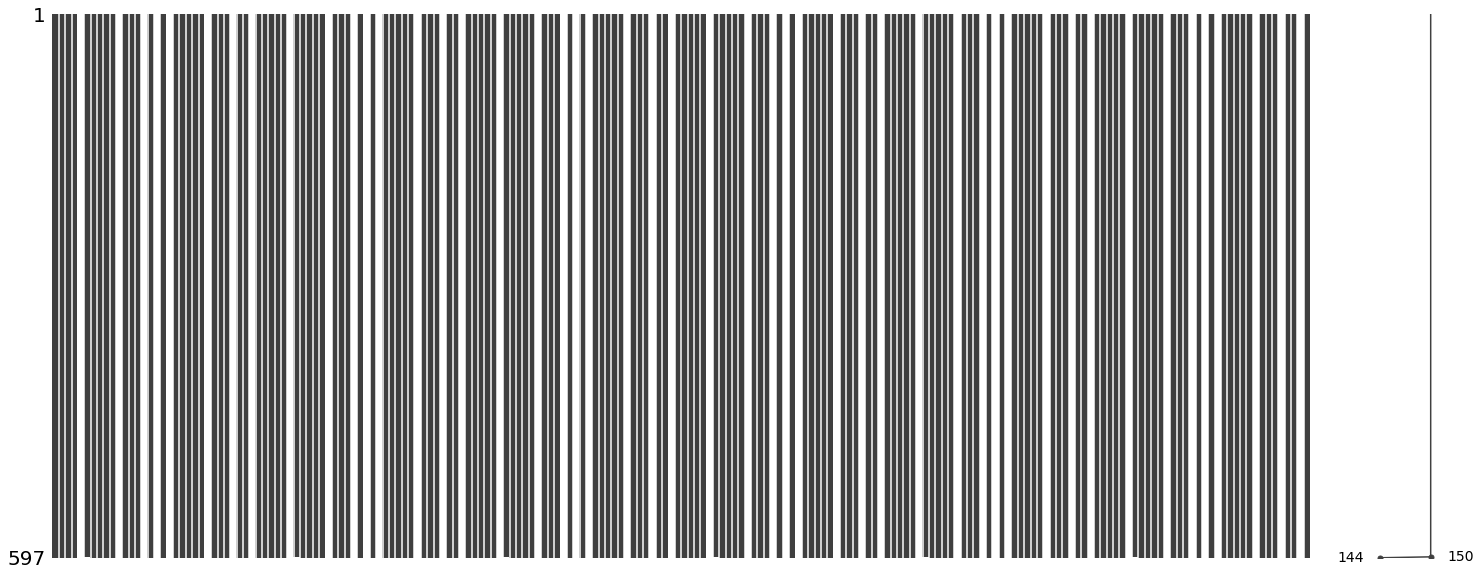

In [32]:
msno.matrix(cotacoes_IBOV2)

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (198).

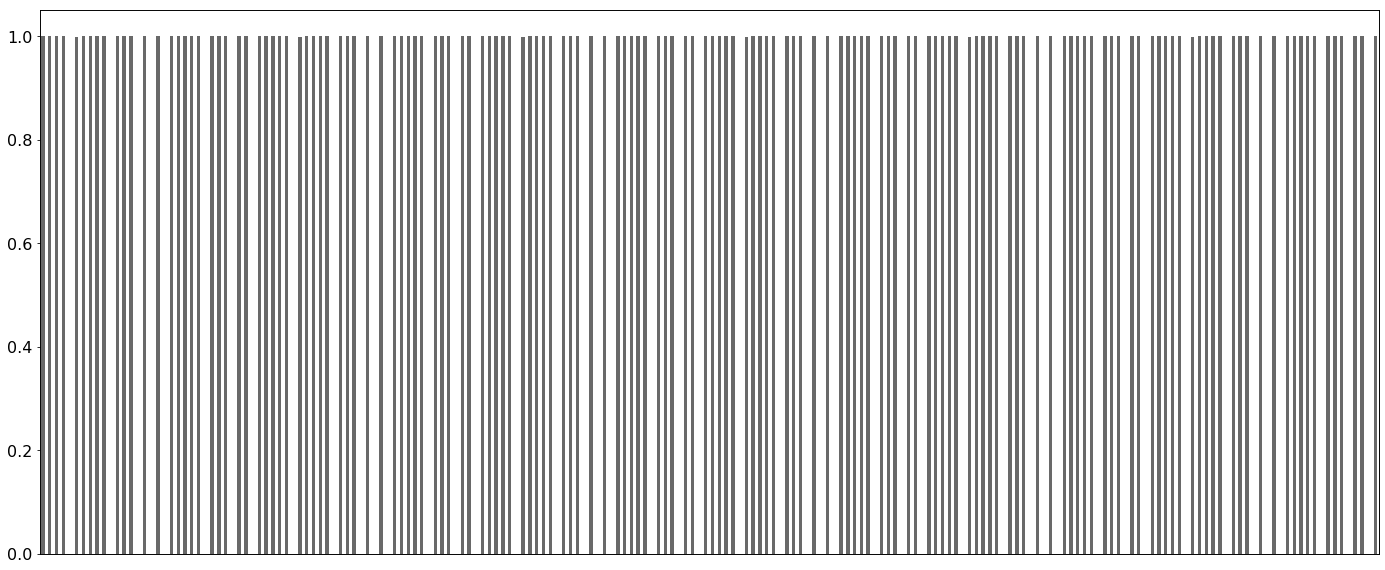

In [33]:
msno.bar(cotacoes_IBOV2)

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

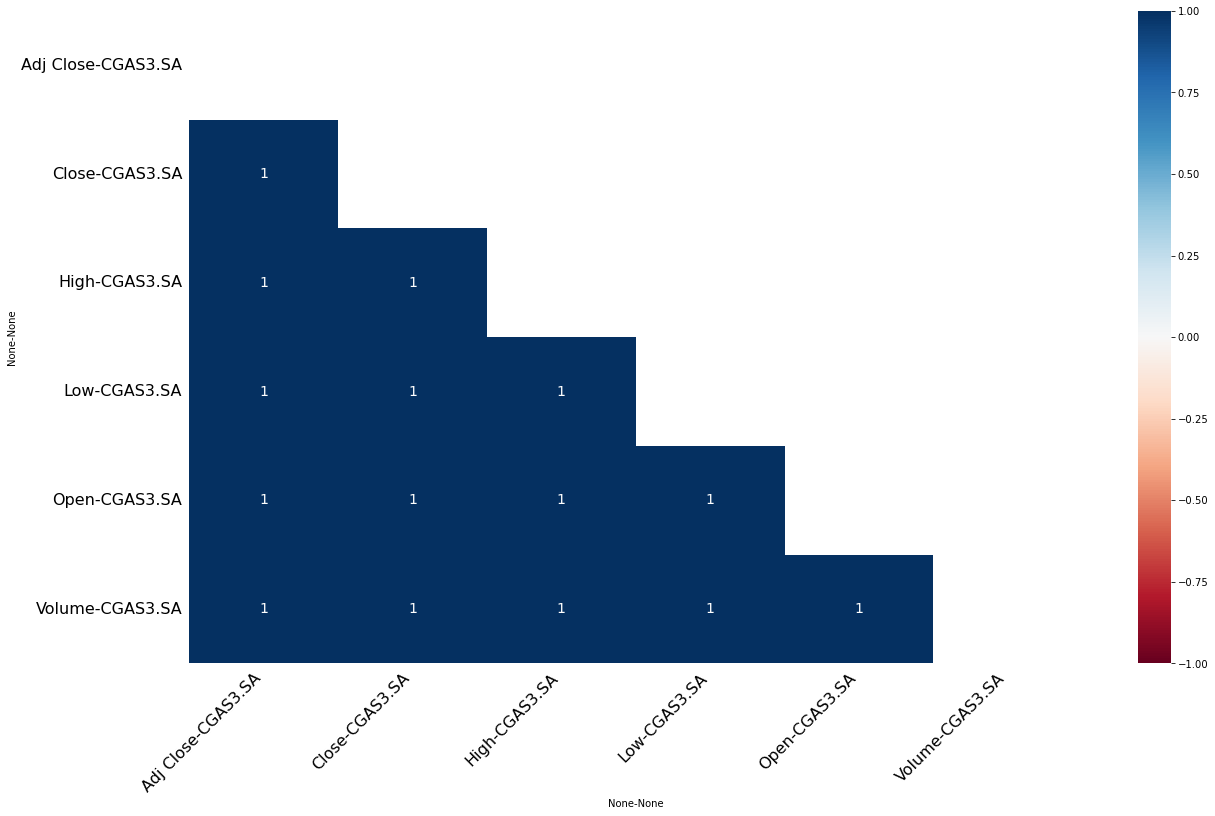

In [36]:
msno.heatmap(cotacoes_IBOV2)

<AxesSubplot:>

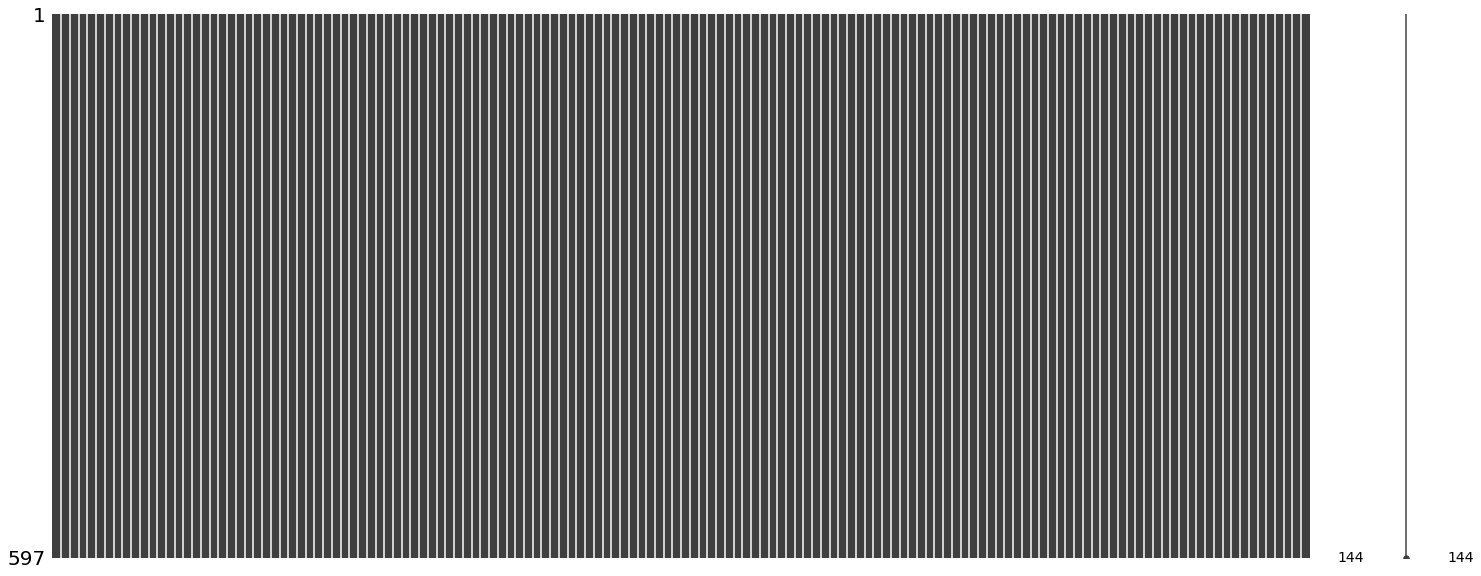

In [37]:
msno.matrix(cotacoes_IBOV_filterNA)

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (144).

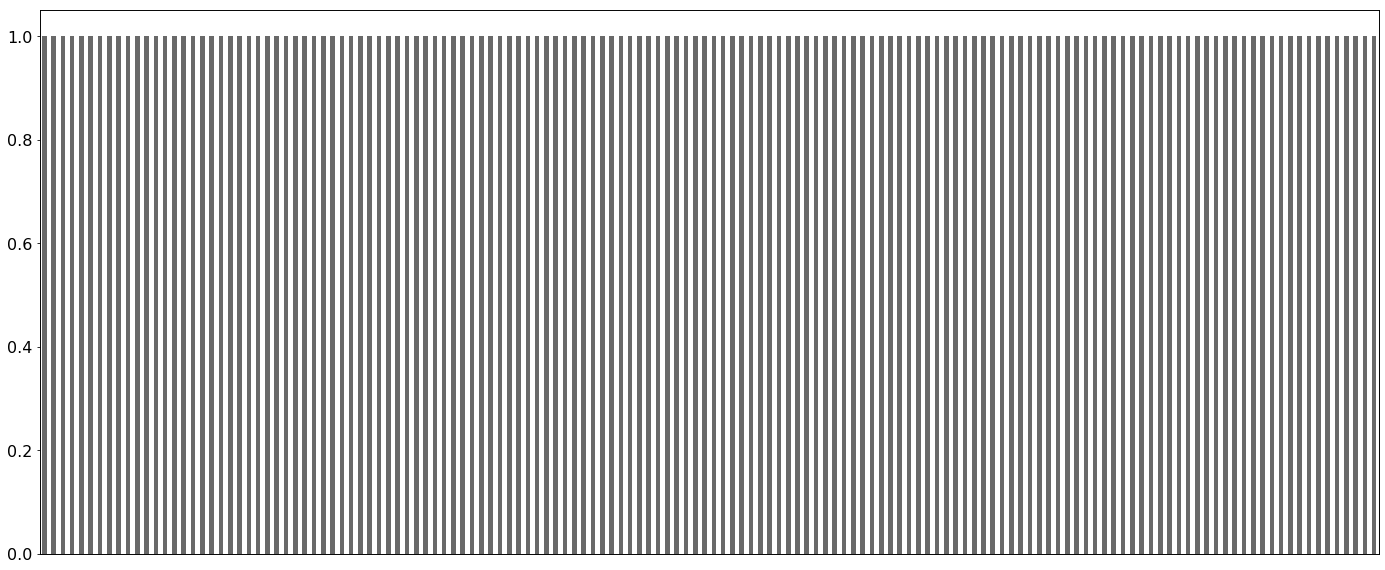

In [38]:
msno.bar(cotacoes_IBOV_filterNA)

/home/mbaltar/miniconda3/envs/curso_modal/lib/python3.10/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/mbaltar/miniconda3/envs/curso_modal/lib/python3.10/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:xlabel='None-None', ylabel='None-None'>

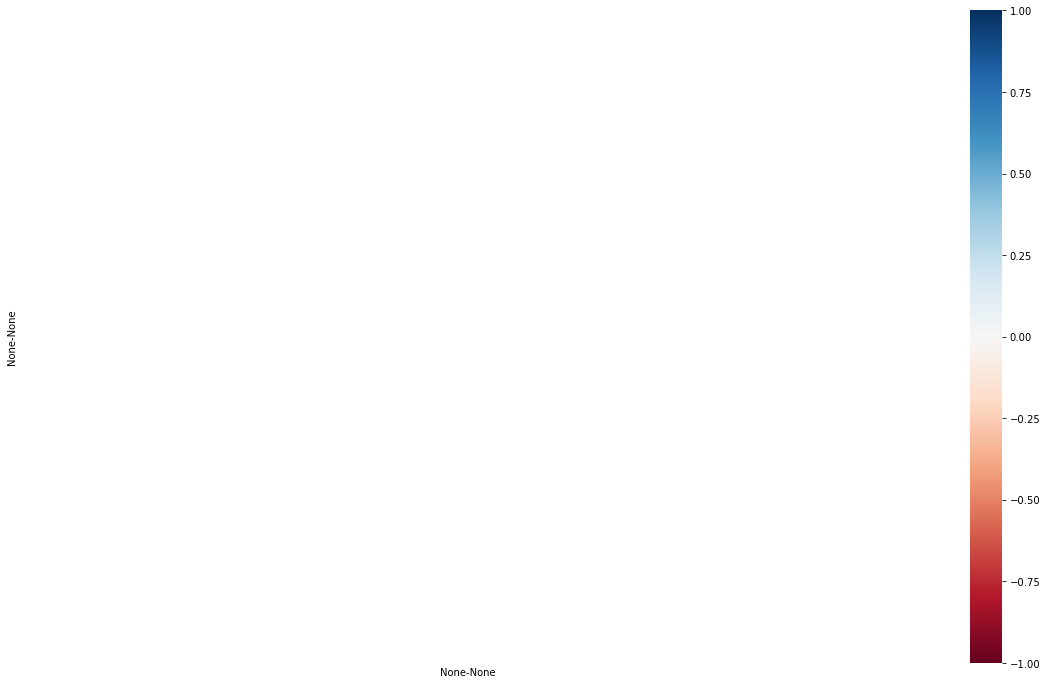

In [39]:
msno.heatmap(cotacoes_IBOV_filterNA)

### 2.6 Preenchimento de NAs

In [40]:
dados = pd.read_csv('Bovespa.csv')
dados.head()

,Date,ABCB4,BBAS3,BBDC4,BPAN4,BTOW3,CGAS3,CMIG4,CSNA3,CYRE3,...,POMO4,QGEP3,RAPT4,SAPR4,SBSP3,SUZB5,TUPY3,USIM5,VALE5,WEGE3
0,6/5/2012,5.778904,13.193346,14.825962,NaN,4.67417,21.089613,16.403233,9.799454,13.011072,...,3.559332,7.938090,6.136378,4.945431,19.482090,4.228104,18.623053,7.724799,28.628716,6.314218
1,6/6/2012,5.784656,13.474055,15.421063,NaN,4.95184,21.367132,17.082111,9.838496,13.979592,...,3.727821,8.013066,6.316431,4.918369,19.842842,4.291890,18.852964,7.456715,29.472841,6.454251
2,6/8/2012,5.836405,13.488092,15.457347,NaN,5.08142,22.088638,17.082111,9.799454,14.025277,...,3.694127,7.825626,6.338035,5.256635,19.926100,4.437686,18.535686,7.635437,29.727674,6.368317
3,6/11/2012,5.922663,13.614412,15.628112,NaN,5.09993,22.088638,17.120369,9.705755,13.723758,...,3.753094,7.413257,6.482082,5.195747,20.203676,4.237216,17.629826,7.883664,29.377279,6.368317
4,6/12/2012,5.876658,13.614412,15.886813,NaN,5.34984,22.088638,17.689350,9.736986,13.632388,...,3.799433,7.413257,6.482082,5.202512,20.739265,4.146093,17.933311,7.754586,30.038250,6.365140


In [41]:
acao = 'CYRE3'
dados.index = pd.to_datetime(dados.Date)

In [42]:
cyre = dados[acao]

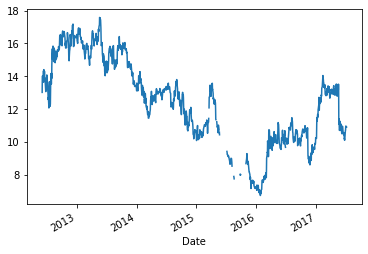

In [43]:
cyre.plot();

In [44]:
cyre2 = cyre.fillna(method='ffill', axis=0)

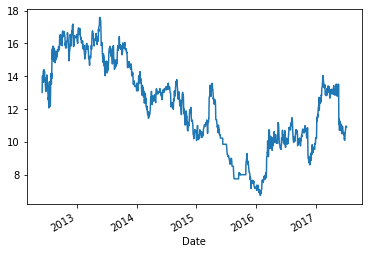

In [45]:
cyre2.plot();

In [46]:
cyre.head()

Date
2012-06-05    13.011072
2012-06-06    13.979592
2012-06-08    14.025277
2012-06-11    13.723758
2012-06-12    13.632388
Name: CYRE3, dtype: float64

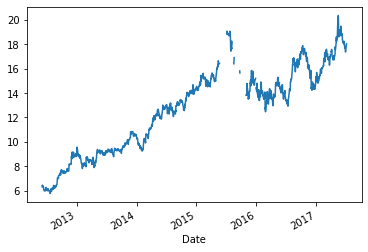

In [47]:
wege = dados['WEGE3']
wege.plot();

In [48]:
wege.interpolate(inplace=True)

<AxesSubplot:xlabel='Date'>

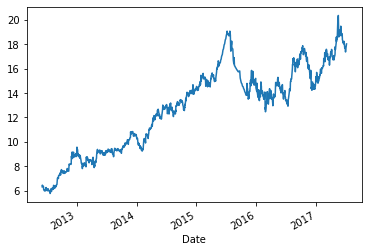

In [49]:
wege.plot()

In [50]:
### 2.7 Redução Wide to Long

cotacoes_ativos_long = pd.melt(cotacoes_IBOV2, ignore_index=False)
cotacoes_ativos_long
 

,variable_0,variable_1,value
Date,,,
2020-01-02,Adj Close,ABCB4.SA,1.816527e+01
2020-01-03,Adj Close,ABCB4.SA,1.856794e+01
2020-01-06,Adj Close,ABCB4.SA,1.845162e+01
2020-01-07,Adj Close,ABCB4.SA,1.821896e+01
2020-01-08,Adj Close,ABCB4.SA,1.816527e+01
...,...,...,...
2022-05-24,Volume,WEGE3.SA,8.546100e+06
2022-05-25,Volume,WEGE3.SA,1.106070e+07
2022-05-26,Volume,WEGE3.SA,7.967100e+06


In [51]:
# Renomeando colunas
cotacoes_ativos_long.rename({'variable_0':'parametro', 'variable_1': 'Ativo', 'value':'valor'}, axis=1, inplace=True)

In [52]:
cotacoes_ativos_long

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,ABCB4.SA,1.816527e+01
2020-01-03,Adj Close,ABCB4.SA,1.856794e+01
2020-01-06,Adj Close,ABCB4.SA,1.845162e+01
2020-01-07,Adj Close,ABCB4.SA,1.821896e+01
2020-01-08,Adj Close,ABCB4.SA,1.816527e+01
...,...,...,...
2022-05-24,Volume,WEGE3.SA,8.546100e+06
2022-05-25,Volume,WEGE3.SA,1.106070e+07
2022-05-26,Volume,WEGE3.SA,7.967100e+06


In [53]:
# Categorias únicas dentro de uma coluna
set(cotacoes_ativos_long['Ativo'])

{'ABCB4.SA',
 'BBAS3.SA',
 'BBDC4.SA',
 'BPAN4.SA',
 'BTOW3.SA',
 'CGAS3.SA',
 'CMIG4.SA',
 'CSNA3.SA',
 'CYRE3.SA',
 'ELET3.SA',
 'ELPL4.SA',
 'ENBR3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FIBR3.SA',
 'GOAU4.SA',
 'HGTX3.SA',
 'ITUB4.SA',
 'LAME4.SA',
 'LREN3.SA',
 'MRVE3.SA',
 'MYPK3.SA',
 'PETR4.SA',
 'POMO4.SA',
 'QGEP3.SA',
 'RAPT4.SA',
 'SAPR4.SA',
 'SBSP3.SA',
 'SUZB5.SA',
 'TUPY3.SA',
 'USIM5.SA',
 'VALE5.SA',
 'WEGE3.SA'}

In [54]:
# Mesmo resultado do exemplo anterior
cotacoes_ativos_long['Ativo'].unique()

array(['ABCB4.SA', 'BBAS3.SA', 'BBDC4.SA', 'BPAN4.SA', 'BTOW3.SA',
       'CGAS3.SA', 'CMIG4.SA', 'CSNA3.SA', 'CYRE3.SA', 'ELET3.SA',
       'ELPL4.SA', 'ENBR3.SA', 'EQTL3.SA', 'EZTC3.SA', 'FIBR3.SA',
       'GOAU4.SA', 'HGTX3.SA', 'ITUB4.SA', 'LAME4.SA', 'LREN3.SA',
       'MRVE3.SA', 'MYPK3.SA', 'PETR4.SA', 'POMO4.SA', 'QGEP3.SA',
       'RAPT4.SA', 'SAPR4.SA', 'SBSP3.SA', 'SUZB5.SA', 'TUPY3.SA',
       'USIM5.SA', 'VALE5.SA', 'WEGE3.SA'], dtype=object)

### 2.7 Filtros e substituições

In [55]:
df_cotacoes = cotacoes_ativos_long.copy()

In [56]:
# Filtrando somente as linhas onde parametro = 'Adj Close'

df_cotacoes[df_cotacoes.parametro == 'Adj Close']

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,ABCB4.SA,18.165266
2020-01-03,Adj Close,ABCB4.SA,18.567944
2020-01-06,Adj Close,ABCB4.SA,18.451616
2020-01-07,Adj Close,ABCB4.SA,18.218956
2020-01-08,Adj Close,ABCB4.SA,18.165266
...,...,...,...
2022-05-24,Adj Close,WEGE3.SA,26.080000
2022-05-25,Adj Close,WEGE3.SA,25.309999
2022-05-26,Adj Close,WEGE3.SA,25.709999


In [57]:
# Filtrando por duas condições

df_cotacoes[(df_cotacoes.parametro == 'Adj Close') & (df_cotacoes.valor < 10)]

,parametro,Ativo,valor
Date,,,
2020-03-23,Adj Close,ABCB4.SA,9.789815
2020-01-22,Adj Close,BPAN4.SA,9.959387
2020-01-23,Adj Close,BPAN4.SA,9.996971
2020-01-24,Adj Close,BPAN4.SA,9.752683
2020-01-27,Adj Close,BPAN4.SA,9.489605
...,...,...,...
2020-11-13,Adj Close,USIM5.SA,9.566854
2020-11-16,Adj Close,USIM5.SA,9.724550
2020-11-17,Adj Close,USIM5.SA,9.882245


In [58]:
df_cotacoes_Volume = df_cotacoes[df_cotacoes['parametro'] == 'Volume']
df_cotacoes_Volume

,parametro,Ativo,valor
Date,,,
2020-01-02,Volume,ABCB4.SA,870400.0
2020-01-03,Volume,ABCB4.SA,1040200.0
2020-01-06,Volume,ABCB4.SA,1129800.0
2020-01-07,Volume,ABCB4.SA,1010900.0
2020-01-08,Volume,ABCB4.SA,504000.0
...,...,...,...
2022-05-24,Volume,WEGE3.SA,8546100.0
2022-05-25,Volume,WEGE3.SA,11060700.0
2022-05-26,Volume,WEGE3.SA,7967100.0


In [59]:
# Remove os NAs gerando um valor por interpolação
df_cotacoes_Volume['valor'].interpolate(inplace=True)

/tmp/ipykernel_355/3444198899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cotacoes_Volume['valor'].interpolate(inplace=True)


In [60]:
valor_mediano = np.median(df_cotacoes_Volume.valor)

In [61]:
df_cotacoes[df_cotacoes.valor > valor_mediano]

,parametro,Ativo,valor
Date,,,
2020-01-02,Volume,BBAS3.SA,13159900.0
2020-01-03,Volume,BBAS3.SA,9465400.0
2020-01-06,Volume,BBAS3.SA,9999900.0
2020-01-07,Volume,BBAS3.SA,10638500.0
2020-01-08,Volume,BBAS3.SA,21468600.0
...,...,...,...
2022-05-23,Volume,WEGE3.SA,8069400.0
2022-05-24,Volume,WEGE3.SA,8546100.0
2022-05-25,Volume,WEGE3.SA,11060700.0


In [62]:
df_cotacoes[(df_cotacoes.parametro == 'Adj Close') & ((df_cotacoes.valor < 10) | (df_cotacoes.valor > 80))]

,parametro,Ativo,valor
Date,,,
2020-03-23,Adj Close,ABCB4.SA,9.789815
2020-01-22,Adj Close,BPAN4.SA,9.959387
2020-01-23,Adj Close,BPAN4.SA,9.996971
2020-01-24,Adj Close,BPAN4.SA,9.752683
2020-01-27,Adj Close,BPAN4.SA,9.489605
...,...,...,...
2020-11-13,Adj Close,USIM5.SA,9.566854
2020-11-16,Adj Close,USIM5.SA,9.724550
2020-11-17,Adj Close,USIM5.SA,9.882245


In [63]:
ativos_churrasco = ['ABEV3.SA', 'JBSS3.SA', 'CRFB3.SA', 'KLBN11.SA', 'RADL3.SA']
df_cotacoes[df_cotacoes.Ativo.isin(ativos_churrasco)]

,parametro,Ativo,valor
Date,,,


In [64]:
# Filtra papéis que NÃO são bancos (note a utilização do operador ~)
alguns_bancos = ['ITUB4.SA', 'BBDC4.SA', 'BBAS3.SA', 'SANB11.SA', 'BIDI11.SA']
df_cotacoes_nao_churras = df_cotacoes[~df_cotacoes.Ativo.isin(alguns_bancos)]
df_cotacoes_nao_churras

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,ABCB4.SA,1.816527e+01
2020-01-03,Adj Close,ABCB4.SA,1.856794e+01
2020-01-06,Adj Close,ABCB4.SA,1.845162e+01
2020-01-07,Adj Close,ABCB4.SA,1.821896e+01
2020-01-08,Adj Close,ABCB4.SA,1.816527e+01
...,...,...,...
2022-05-24,Volume,WEGE3.SA,8.546100e+06
2022-05-25,Volume,WEGE3.SA,1.106070e+07
2022-05-26,Volume,WEGE3.SA,7.967100e+06


In [65]:
df_cotacoes.index

Index([2020-01-02 00:00:00, 2020-01-03 00:00:00, 2020-01-06 00:00:00,
       2020-01-07 00:00:00, 2020-01-08 00:00:00, 2020-01-09 00:00:00,
       2020-01-10 00:00:00, 2020-01-13 00:00:00, 2020-01-14 00:00:00,
       2020-01-15 00:00:00,
       ...
       2022-05-17 00:00:00, 2022-05-18 00:00:00, 2022-05-19 00:00:00,
       2022-05-20 00:00:00, 2022-05-23 00:00:00, 2022-05-24 00:00:00,
       2022-05-25 00:00:00, 2022-05-26 00:00:00, 2022-05-27 00:00:00,
       2022-05-30 00:00:00],
      dtype='object', name='Date', length=118206)

In [66]:
df_cotacoes.index = pd.to_datetime(df_cotacoes.index)
df_cotacoes.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20',
               '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
               '2022-05-27', '2022-05-30'],
              dtype='datetime64[ns]', name='Date', length=118206, freq=None)

In [67]:
df_cotacoes.loc['2020-01-02']

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,ABCB4.SA,1.816527e+01
2020-01-02,Adj Close,BBAS3.SA,4.639706e+01
2020-01-02,Adj Close,BBDC4.SA,2.608958e+01
2020-01-02,Adj Close,BPAN4.SA,1.022247e+01
2020-01-02,Adj Close,BTOW3.SA,NaN
...,...,...,...
2020-01-02,Volume,SUZB5.SA,NaN
2020-01-02,Volume,TUPY3.SA,7.877000e+05
2020-01-02,Volume,USIM5.SA,1.608630e+07


In [68]:
# Filtrando um range de datas
data_range_IBOV = pd.date_range(start='2021-03-21', end='2021-03-31')

In [69]:
df_cotacoes[df_cotacoes.index.isin(data_range_IBOV)]

,parametro,Ativo,valor
Date,,,
2021-03-22,Adj Close,ABCB4.SA,1.398050e+01
2021-03-23,Adj Close,ABCB4.SA,1.379557e+01
2021-03-24,Adj Close,ABCB4.SA,1.359215e+01
2021-03-25,Adj Close,ABCB4.SA,1.337948e+01
2021-03-26,Adj Close,ABCB4.SA,1.352742e+01
...,...,...,...
2021-03-25,Volume,WEGE3.SA,1.157660e+07
2021-03-26,Volume,WEGE3.SA,1.113440e+07
2021-03-29,Volume,WEGE3.SA,9.868800e+06


In [70]:
# Retornando apenas as ações ordinárias (que terminam com '3' no nome do ticker)
df_cotacoes.Ativo.str[4]

Date
2020-01-02    4
2020-01-03    4
2020-01-06    4
2020-01-07    4
2020-01-08    4
             ..
2022-05-24    3
2022-05-25    3
2022-05-26    3
2022-05-27    3
2022-05-30    3
Name: Ativo, Length: 118206, dtype: object

In [71]:
df_cotacoes[df_cotacoes.Ativo.str[4] == '3']

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,BBAS3.SA,4.639706e+01
2020-01-03,Adj Close,BBAS3.SA,4.631944e+01
2020-01-06,Adj Close,BBAS3.SA,4.570715e+01
2020-01-07,Adj Close,BBAS3.SA,4.536218e+01
2020-01-08,Adj Close,BBAS3.SA,4.494823e+01
...,...,...,...
2022-05-24,Volume,WEGE3.SA,8.546100e+06
2022-05-25,Volume,WEGE3.SA,1.106070e+07
2022-05-26,Volume,WEGE3.SA,7.967100e+06


In [73]:
list(df_cotacoes['Ativo'].unique())

['ABCB4.SA',
 'BBAS3.SA',
 'BBDC4.SA',
 'BPAN4.SA',
 'BTOW3.SA',
 'CGAS3.SA',
 'CMIG4.SA',
 'CSNA3.SA',
 'CYRE3.SA',
 'ELET3.SA',
 'ELPL4.SA',
 'ENBR3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FIBR3.SA',
 'GOAU4.SA',
 'HGTX3.SA',
 'ITUB4.SA',
 'LAME4.SA',
 'LREN3.SA',
 'MRVE3.SA',
 'MYPK3.SA',
 'PETR4.SA',
 'POMO4.SA',
 'QGEP3.SA',
 'RAPT4.SA',
 'SAPR4.SA',
 'SBSP3.SA',
 'SUZB5.SA',
 'TUPY3.SA',
 'USIM5.SA',
 'VALE5.SA',
 'WEGE3.SA']

In [80]:
# Tirando o '.SA' do nome dos papéis
df_cotacoes_semSA = df_cotacoes.replace(to_replace=r'.SA$', value='', regex=True)

In [81]:
df_cotacoes_semSA

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,ABCB4,1.816527e+01
2020-01-03,Adj Close,ABCB4,1.856794e+01
2020-01-06,Adj Close,ABCB4,1.845162e+01
2020-01-07,Adj Close,ABCB4,1.821896e+01
2020-01-08,Adj Close,ABCB4,1.816527e+01
...,...,...,...
2022-05-24,Volume,WEGE3,8.546100e+06
2022-05-25,Volume,WEGE3,1.106070e+07
2022-05-26,Volume,WEGE3,7.967100e+06


### 2.8 Duplicatas

In [84]:
# Retorna se existe duplicatas
df_cotacoes_semSA.duplicated().any()

True

In [87]:
print(df_cotacoes_semSA['parametro'].duplicated().any(),
df_cotacoes_semSA['Ativo'].duplicated().any(),
df_cotacoes_semSA['valor'].duplicated().any())

True True True


In [88]:
df_cotacoes_semSA[df_cotacoes_semSA.duplicated(keep=False)]

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,ABCB4,18.165266
2020-01-08,Adj Close,ABCB4,18.165266
2020-01-09,Adj Close,ABCB4,18.165266
2020-03-12,Adj Close,ABCB4,12.381498
2020-03-26,Adj Close,ABCB4,12.567888
...,...,...,...
2022-05-24,Volume,VALE5,NaN
2022-05-25,Volume,VALE5,NaN
2022-05-26,Volume,VALE5,NaN


In [ ]:
# Caso quiséssemos remover as duplicatas
# Não vou fazer isso porque estas duplicatas podem ocorrer mesmo (veja o retorno do dataframe acima)
#sem_duplicatas = df_cotacoes_semSA.drop_duplicates(subset=['paramentro', 'Ativo', 'valor'], keep=False)

### 2.9 Drop

In [94]:
pd.to_datetime('2021-01-04')

Timestamp('2021-01-04 00:00:00')

In [95]:
df_cotacoes_semSA.drop(['2020-01-02'])

,parametro,Ativo,valor
Date,,,
2020-01-03,Adj Close,ABCB4,1.856794e+01
2020-01-06,Adj Close,ABCB4,1.845162e+01
2020-01-07,Adj Close,ABCB4,1.821896e+01
2020-01-08,Adj Close,ABCB4,1.816527e+01
2020-01-09,Adj Close,ABCB4,1.816527e+01
...,...,...,...
2022-05-24,Volume,WEGE3,8.546100e+06
2022-05-25,Volume,WEGE3,1.106070e+07
2022-05-26,Volume,WEGE3,7.967100e+06


In [97]:
df_cotacoes_semSA.drop(['valor'], axis=1)

,parametro,Ativo
Date,,
2020-01-02,Adj Close,ABCB4
2020-01-03,Adj Close,ABCB4
2020-01-06,Adj Close,ABCB4
2020-01-07,Adj Close,ABCB4
2020-01-08,Adj Close,ABCB4
...,...,...
2022-05-24,Volume,WEGE3
2022-05-25,Volume,WEGE3
2022-05-26,Volume,WEGE3


In [98]:
# Podemos remover pelo índice da coluna também
df_cotacoes_semSA.drop(df_cotacoes_semSA.columns[[0, 1]], axis=1)

,valor
Date,
2020-01-02,1.816527e+01
2020-01-03,1.856794e+01
2020-01-06,1.845162e+01
2020-01-07,1.821896e+01
2020-01-08,1.816527e+01
...,...
2022-05-24,8.546100e+06
2022-05-25,1.106070e+07
2022-05-26,7.967100e+06


In [102]:
# Exercício
# Filtrar os dados do Adjusted Close de ABEV3, e depois remover as linhas correspondentes aos meses de Abril e Maio

wege = df_cotacoes_semSA[(df_cotacoes_semSA['parametro'] == 'Adj Close') & (df_cotacoes_semSA['Ativo'] == 'WEGE3')]

<AxesSubplot:xlabel='Date'>

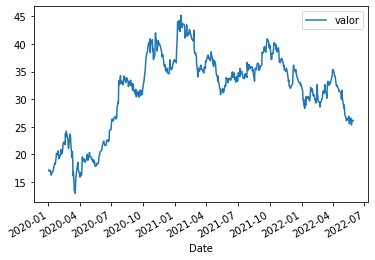

In [103]:
wege.plot()

In [104]:
date_range_wege = pd.date_range(start = '2021-04-01', end='2021-05-31')
date_range_wege

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12',
               '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
               '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
               '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30', '2021-05-01', '2021-05-02',
               '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06',
               '2021-05-07', '2021-05-08', '2021-05-09', '2021-05-10',
               '2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
               '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
               '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
      

In [105]:
type(date_range_wege)

pandas.core.indexes.datetimes.DatetimeIndex

In [108]:
# dropando usando o parâmetro errors='ignore' para nãs reclamar das datas que não são encontradas
wege.drop(date_range_wege, errors='ignore')

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,WEGE3,17.142605
2020-01-03,Adj Close,WEGE3,16.923702
2020-01-06,Adj Close,WEGE3,16.967482
2020-01-07,Adj Close,WEGE3,17.098824
2020-01-08,Adj Close,WEGE3,16.451841
...,...,...,...
2022-05-24,Adj Close,WEGE3,26.080000
2022-05-25,Adj Close,WEGE3,25.309999
2022-05-26,Adj Close,WEGE3,25.709999


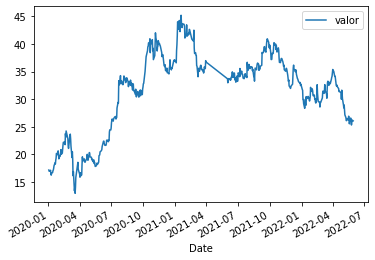

In [109]:
wege.drop(date_range_wege, errors='ignore').plot();

In [ ]:
# Por hoje é só